# EIT-CEM Simulated Data - Experiment 1

In [1]:
#Fixing paths
import sys, time
sys.path.append('../../FEIT_codes') # Add the parent directory to the path list

#Importing modules
from FEIT_onefile import *
import seaborn as sns
sns.set_context("talk")


#Experiment name
exp_name="exp1"

## Mesh

In [2]:
"Basic Definitions"
r=1            #Circle radius
L=16           #Number of Electrodes
per_cober=0.5  #Percentage of area covered by electrodes
rotate=0       #Rotation

#Return object with angular position of each electrode
ele_pos=electrodes_position(L, per_cober, rotate)

In [3]:
refine_n=8 #Refinement mesh
n_in=8     #Vertex on elec.
n_out=2    #Vertex on gaps (Sometimes it is important.)

mesh_inverse=MyMesh(r, refine_n, n_in, n_out, ele_pos)
mesh_forward=MyMesh(r, refine_n*3, n_in*3, n_out*3, ele_pos)


Mesh $\Theta$:
N: 2091, M: 480, K:3700
Mesh $\T$:
N: 378, M: 160, K:594


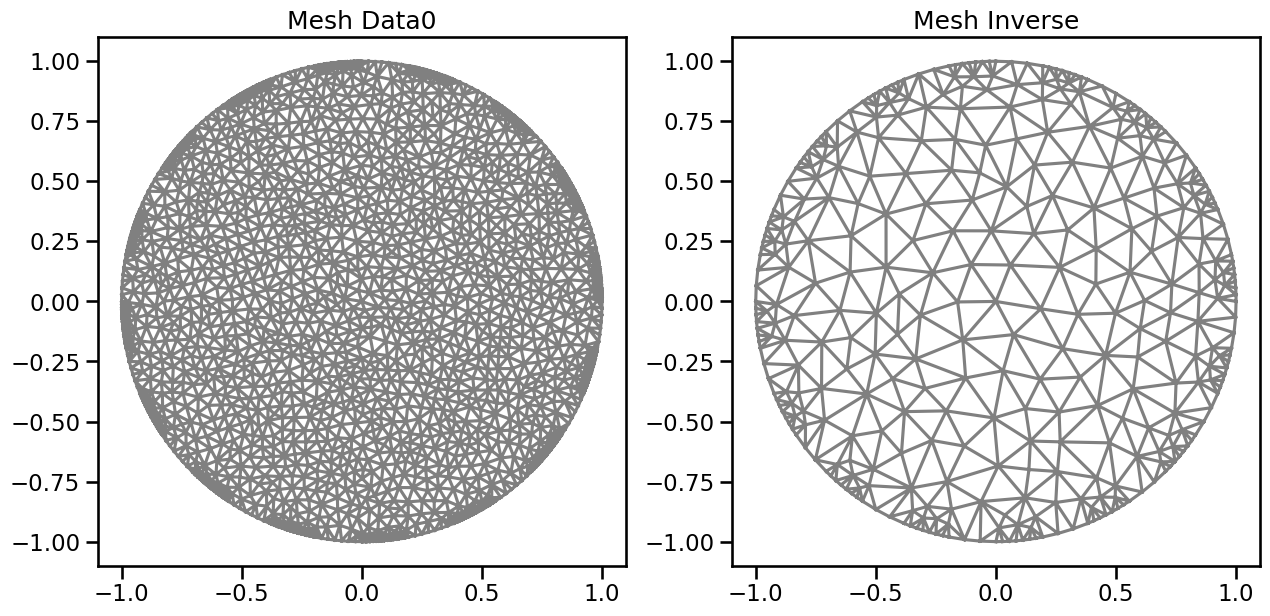

In [4]:
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plot(mesh_forward, title="Mesh Data0");
plt.subplot(1,2,2)
plot(mesh_inverse, title="Mesh Inverse");

# Printing Mesh config
print("Mesh $\Theta$:")
bmesh=BoundaryMesh(mesh_forward, 'exterior', order=True)
print("N: {}, M: {}, K:{}".format(mesh_forward.num_vertices(), bmesh.num_vertices(), mesh_forward.num_cells()))
bmesh=BoundaryMesh(mesh_inverse, 'exterior', order=True)
print("Mesh $\T$:")
print("N: {}, M: {}, K:{}".format(mesh_inverse.num_vertices(), bmesh.num_vertices(), mesh_inverse.num_cells()))

## Defining $\gamma$

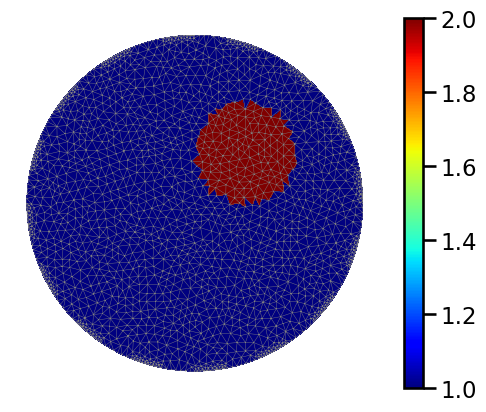

In [5]:
#Defining the function gamma in Descontinuous Galerkin
Q = FunctionSpace(mesh_forward, "DG", 0) #Define Function space with basis Descontinuous Galerkin
ValuesCells0=GammaCircle(mesh_forward,2,1.0,0.3, 0.3, 0.3); #mesh, cond_in, cond_out, radius, certerx, cerntery
gamma = Function(Q)
gamma.vector()[:]=ValuesCells0


"Plot"
plot_figure(gamma, name="", map="jet");
plot(mesh_forward, linewidth=0.3)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.savefig("figures/{}/gamma_plus.png".format(exp_name), bbox_inches='tight', transparent=True)

## Forward Problem

In [6]:
#Defining impedances, experiments and currents
z=np.ones(L)*2.5E-5     #Impedance of each electrode
l=L-1                   #Numero of experiments
I_all=current_method( L , l, method=2)  #Current

print(I_all)

[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

In [8]:
ForwardObject=ForwardProblem(mesh_forward, z)

VD=FiniteElement('CG',mesh_forward.ufl_cell(),1) #Solution Space Continous Galerkin
list_u,list_U0 = ForwardObject.solve_forward(VD, I_all, gamma)
list_U0 = (np.array(list_U0).flatten())


In [ ]:
#Noise add
noise_level=0.0025
noise_type='uniform'
list_U0_noised=fn_addnoise(list_U0, noise_level, noise_type, seed=42)
#list_U0_noised=list_U0

### Plotting noised data $U^\delta$

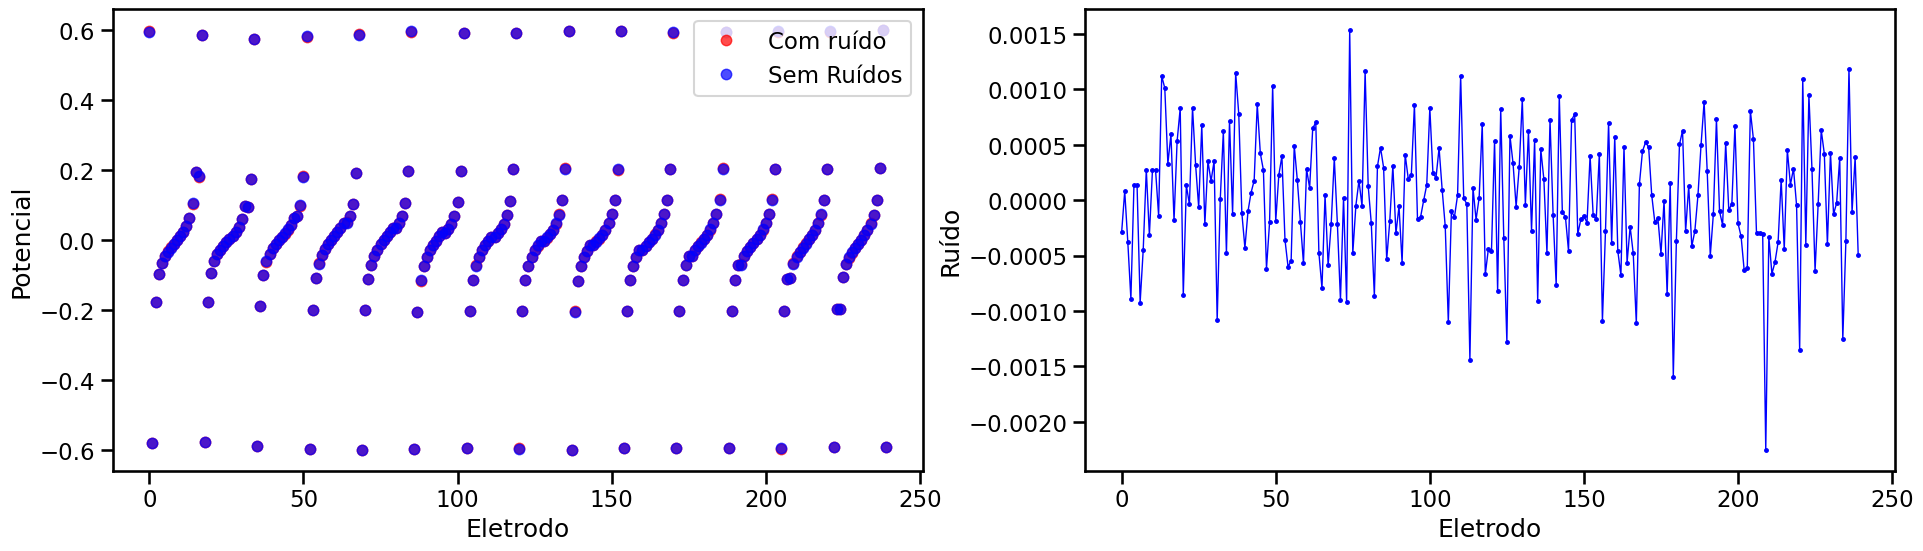

In [ ]:
if noise_level>1E-5:
    vec_U0_noise=list_U0_noised.real#[0:L]
    vec_U0=list_U0.real#[0:L]
    x=range(len(vec_U0_noise))

    fig, ax = plt.subplots(1,2, figsize=(23,6))
    ax[0].plot(x, vec_U0_noise, linewidth=0,  marker='.', markersize=15, label="Com ruído", color='red', alpha=0.7);
    ax[0].plot(x, vec_U0, linewidth=0,  marker='.', markersize=15, label="Sem Ruídos", color="blue", alpha=0.7);
    ax[0].set_xlabel("Eletrodo")
    ax[0].set_ylabel("Potencial")
    ax[0].legend()

    ax[1].plot(x, vec_U0-vec_U0_noise, linewidth=1,  marker='.', markersize=5, color="blue");
    ax[1].set_xlabel("Eletrodo")
    ax[1].set_ylabel("Ruído")
    
    
plt.savefig("figures/{}/noise_pattern.png".format(exp_name), bbox_inches='tight', transparent=True)

### Solver parameters

In [ ]:
solverconfig_dict= { 
            #General Parameters
            "step_limit": 100,
            "tau": 1.05,
            "noise_level": noise_level,
            "weight_value": False,
            "innerstep_limit": 1,
            #General newton method parameters
            "mu_i":0.85,
            "mu_max":0.999,
            "nu":0.97,
            "R":0.97,
}

In [ ]:
#LM = Levenberg-Marquadt
list_exps = ["LW", "LM", "NLW", "NTK"]
experiments = {}
for exp in list_exps: 
    experiments[exp] = {} 
    experiments[exp]["config"] = solverconfig_dict.copy()
    experiments[exp]["results"] = {}

#Setting parameters for each experiment
#Landweber
experiments["LW"]["config"]["inner_method"]="Landweber"
experiments["LW"]["config"]["land_a"]=20

#Levenberg-Marquadt
experiments["LM"]["config"]["inner_method"]="LM"
experiments["LM"]["config"]["LM_c0"]=0.001
experiments["LM"]["config"]["LM_q"]=1

#Newton-Landweber
experiments["NLW"]["config"]["inner_method"]="Landweber"
experiments["NLW"]["config"]["innerstep_limit"]=1000
experiments["NLW"]["config"]["land_a"]=20

#Newton-LM
experiments["NTK"]["config"]["inner_method"]="Tikhonov"
experiments["NTK"]["config"]["innerstep_limit"]=1000
experiments["NTK"]["config"]["Tik_c0"]=0.001
experiments["NTK"]["config"]["Tik_q"]=1

In [ ]:
for key, experiment in experiments.items():
    print(key)
    #"Object"
    InverseObject=InverseProblem(mesh_inverse, list_U0_noised, I_all, z)
    #First guess
    guess_r=np.ones(mesh_inverse.num_cells())
    InverseObject.set_firstguess(guess_r)
    
    #"Solver Parameters"
    InverseObject.set_solverconfig(**experiment["config"])

    #"Noise Parameters"
    tau=experiment["config"]["tau"]
    print(f"Discrepance stop {tau*noise_level*100}% residue")

    #Solution
    InverseObject.set_answer(gamma, mesh_forward)


    #Call Solver
    start_time = time.time()

    InverseObject.solve_inverse()

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Tempo de execução: {elapsed_time} segundos")
    
    #Getting results
    experiment["results"]["res_vec"]=np.copy(InverseObject.res_vec)
    experiment["results"]["error_vec"]=np.copy(InverseObject.error_vec)
    experiment["results"]["gamma_k"]=InverseObject.gamma_all
    experiment["results"]["innerstep_vec"]=InverseObject.innerstep_vec
    experiment["results"]["time"]=elapsed_time


LW
Discrepance stop 0.2625% residue
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Error (%)= 26.540399150834666 Residue (%)= 9.909999090734685  step: 0 Inner step:  0
mu_n 0.85
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Error (%)= 26.609658355446353 Residue (%)= 4.112210717184484  step: 1 Inner step:  1
mu_n 0.85
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Error (%)= 26.281973393121856 Residue (%)= 3.596244347409689  step: 2 Inner step:  1
mu_n 0.84915
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Error (%)= 25.914066961979433 Residue (%)= 3.2770884072261595  step: 3 Inner step:  1
mu_n 0.84830085
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Error (%)= 25.59985443235494 Residue (%)= 3.009645625786549  step: 4 Inner step:  1
mu_n 0.84745254915
*** Warning: Degree o

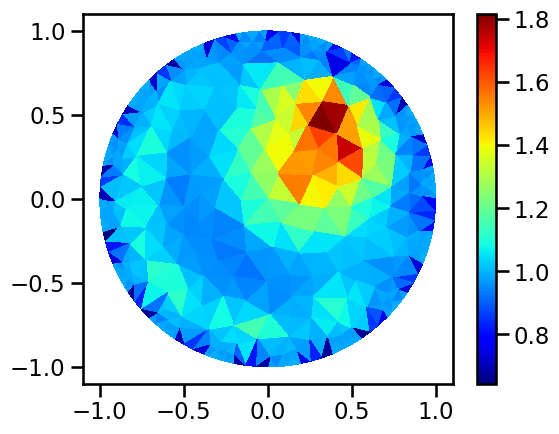

In [ ]:
gamma_k=experiment["results"]["gamma_k"][-2]
#Plot 2D
"Plot result"
Q_DG=FunctionSpace(mesh_inverse, "DG", 0)
gamma_cell = Function(Q_DG)
gamma_cell.vector()[:]=gamma_k          #Transform vector to function
plot_figure(gamma_cell, name="", map="jet");

### Plot gamma_k

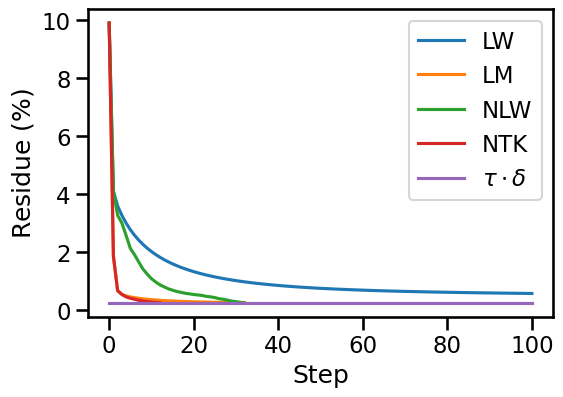

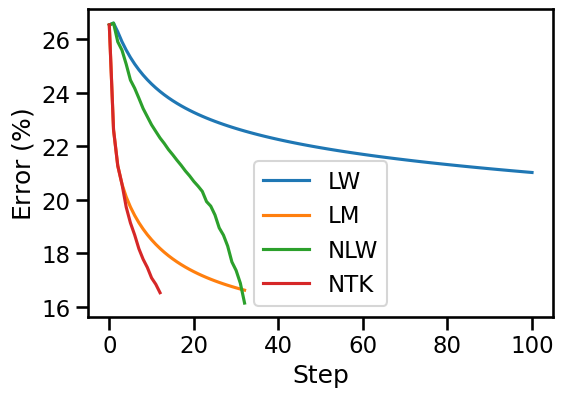

In [ ]:
for key, experiment in experiments.items():   
    gamma_k=experiment["results"]["gamma_k"][-2]
    #Plot 2D
    "Plot result"
    Q_DG=FunctionSpace(mesh_inverse, "DG", 0)
    gamma_cell = Function(Q_DG)
    gamma_cell.vector()[:]=gamma_k          #Transform vector to function
    plot_figure(gamma_cell, name="", map="jet");
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.close()

#Residue Curve
plt.figure(figsize=(6, 4))
plt.ylabel('Residue $(\%)$');
plt.xlabel('Step');
#plt.title('Residue');
max_resvec=1
for key, experiment in experiments.items():   
    res_vec=experiment["results"]["res_vec"]
    max_resvec=max(max_resvec,len(res_vec))
    plt.plot(res_vec, label=key);
plt.plot(np.ones(max_resvec)*tau*noise_level*100, label=r"$\tau \cdot \delta$");
plt.legend()
plt.show()


#Error curve
plt.figure(figsize=(6, 4))
plt.ylabel('Error $(\%)$');
plt.xlabel('Step');
#plt.title('Error');
for key, experiment in experiments.items():   
    error_vec=experiment["results"]["error_vec"]
    plt.plot(error_vec, label=key);
plt.legend()
plt.show()



In [ ]:
import pickle
save_it=True
if save_it:
        for key, experiment in experiments.items():
                with open('data/{}/{}.data'.format(exp_name, key), 'wb') as config_dictionary_file:
                        pickle.dump(experiment, config_dictionary_file)